In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from google.colab import files
from google.colab import drive

In [49]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
data = loadmat('/content/drive/My Drive/Colab Notebooks/Projects/MasterPython_CodeAndData/MasterPython_CodeAndData/4_stateSpaceTrajectories/ALMdata.mat')
data.keys()
nonPreferred = data['PSTH_nonprefer_cue_aligned']
preferred = data['PSTH_prefer_cue_aligned']
t = data['t'][0]
chanidx = data['Channel_all'].flatten()

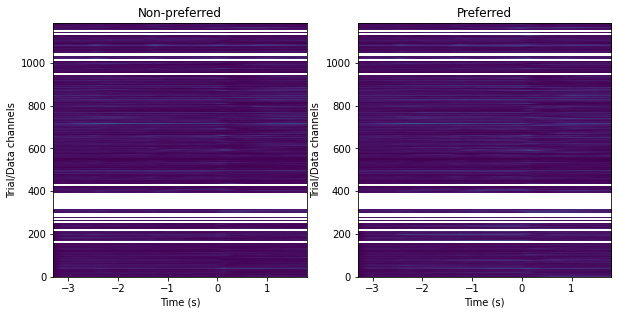

In [51]:
fig,ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].imshow(nonPreferred, extent=[t[0], t[-1], 0, nonPreferred.shape[0]], origin='top')
ax[0].set_aspect(1/ax[0].get_data_ratio())
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Trial/Data channels')
ax[0].set_title('Non-preferred')

ax[1].imshow(preferred, extent=[t[0], t[-1], 0, preferred.shape[0]], origin='top')
ax[1].set_aspect(1/ax[1].get_data_ratio())
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Trial/Data channels')
ax[1].set_title('Preferred')

plt.show()

In [52]:
nonPreferredFiltered = nonPreferred[np.isfinite(nonPreferred[:,0]),:]
print(nonPreferred.shape)

(1186, 5101)


In [53]:
preferredFiltered = preferred[np.isfinite(preferred[:,0]),:]
print(preferred.shape)

(1186, 5101)


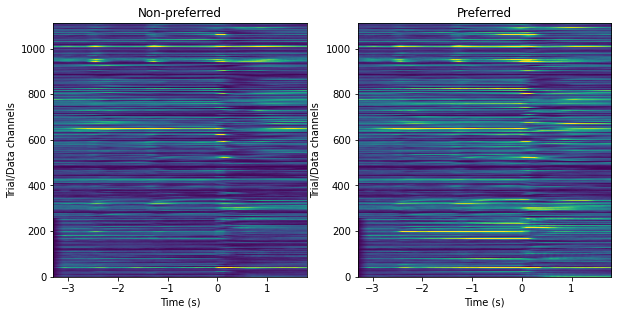

In [54]:
fig,ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].imshow(nonPreferredFiltered, extent=[t[0], t[-1], 0, nonPreferredFiltered.shape[0]], origin='top', vmin=0, vmax=20)
ax[0].set_aspect(1/ax[0].get_data_ratio())
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Trial/Data channels')
ax[0].set_title('Non-preferred')

ax[1].imshow(preferredFiltered, extent=[t[0], t[-1], 0, preferredFiltered.shape[0]], origin='top', vmin=0, vmax=20)
ax[1].set_aspect(1/ax[1].get_data_ratio())
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Trial/Data channels')
ax[1].set_title('Preferred')

plt.show()

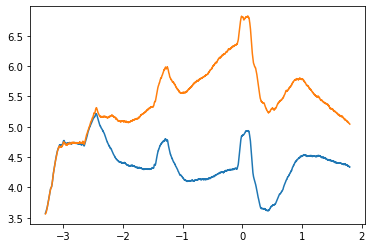

In [55]:
plt.plot(t, np.mean(nonPreferredFiltered, axis=0), label='Non-preferred')
plt.plot(t, np.mean(preferredFiltered, axis=0), label='Preferred')
plt.show()

In [56]:
# Create the channel covariance matrix

In [61]:
# Compute new data matrices
numberOfChannels = np.max(chanidx)
channelAverageNonPreferred = np.zeros((numberOfChannels, len(t)))
for i in range(numberOfChannels):
  channelAverageNonPreferred[i-1,:] = np.mean( nonPreferred[chanidx==1,:],axis=0 )

channelAveragePreferred = np.zeros((numberOfChannels, len(t)))
for i in range(numberOfChannels):
  channelAveragePreferred[i-1,:] = np.mean( preferred[chanidx==1,:],axis=0 )

In [62]:
print(channelAverageNonPreferred.shape)

(64, 5101)


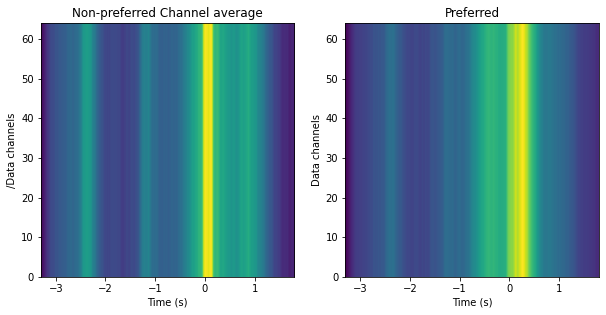

In [63]:
fig,ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].imshow(channelAverageNonPreferred, extent=[t[0], t[-1], 0, channelAverageNonPreferred.shape[0]], origin='top')
ax[0].set_aspect(1/ax[0].get_data_ratio())
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('/Data channels')
ax[0].set_title('Non-preferred Channel average')

ax[1].imshow(channelAveragePreferred, extent=[t[0], t[-1], 0, channelAveragePreferred.shape[0]], origin='top')
ax[1].set_aspect(1/ax[1].get_data_ratio())
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Data channels')
ax[1].set_title('Preferred')

plt.show()

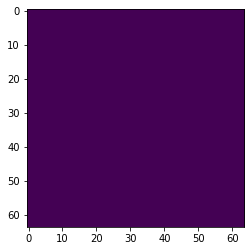

In [65]:
covariancePreferred = np.cov(channelAveragePreferred)
covarianceNonPreferred = np.cov(channelAverageNonPreferred)
covarianceMatrix = (covariancePreferred + covarianceNonPreferred) / 2
plt.imshow(covarianceMatrix)


In [67]:
evals,evecs = np.linalg.eigh(covarianceMatrix)